# **Project Name**    -  EDA of Amazon Prime Content: Trends, Genres, and Ratings



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**  - Tanveer Khan


# **Project Summary -**

This project focuses on analyzing Yes Bank's stock price data to understand how the bank's stock was impacted, especially after the fraud case involving Rana Kapoor in 2018. The dataset includes monthly stock prices, including the closing, opening, highest, and lowest prices since the bank's inception.

The primary objective of the project is to predict the stock's closing price for each month using Time Series and Predictive Models. By exploring the historical trends, the project aims to provide insights into the factors that influence stock prices and create a model that helps forecast future closing prices, aiding investors in making informed decisions.

# **GitHub Link -**

https://github.com/Tanveerr97/Yes_Bank_Stock_Performance_Analysis/blob/main/Yes_Bank_Stock_Performance_Analysis.ipynb

# **Problem Statement**



This project analyzes Yes Bank's stock price data to identify patterns and trends for predicting future stock prices. Through Exploratory Data Analysis (EDA) and Machine Learning (ML) models, the goal is to uncover key correlations, optimize predictive models, and ultimately predict the stock's closing price. By providing actionable insights, the project aims to help investors make informed decisions based on historical data and financial indicators.

#### **Define Your Business Objective?**

* Predict Monthly Closing Prices: 

     Build a model to forecast Yes Bank's stock closing prices for better financial planning.

* Identify Trends:

     Analyze historical stock data to recognize patterns that influence stock price movements.

* Support Investment Decisions:

     Provide insights that help investors and traders make informed decisions based on stock price predictions.

* Minimize Risks: 

     Offer risk management strategies by accurately predicting future stock prices to avoid potential losses.

## ***1. Know Your Data***

### Import Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px



### Dataset Loading

In [157]:
data = pd.read_csv(r"C:\Users\tanve\Desktop\dataset\project_03\data_YesBank_StockPrices.csv")

### Dataset First View

In [158]:
data.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


### Dataset Rows & Columns count

In [159]:
count = data.shape
count


(185, 5)

### Dataset Information

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [161]:
data[data.duplicated()].sum()


Date       0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: object

#### Missing Values/Null Values

In [162]:

missing_values = data.isnull().sum()
missing_values


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

* Contains 185 rows and 5 columns, tracking Yes Bank’s stock prices over time.

* The columns include Date, Open, High, Low, and Close prices.


## ***2. Understanding Your Variables***

In [163]:
column_names = list(data.columns)
column_names

['Date', 'Open', 'High', 'Low', 'Close']

### Variables Description

* Date (object): In "MMM-YY" format (e.g., "Jul-05" for July 2005).

* Open (float): Opening stock price.

* High (float): Highest stock price reached.

* Low (float): Lowest stock price reached.

* Close (float): Closing stock price.

### Check Unique Values for each variable.

In [164]:
data.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [165]:


# Drop duplicate rows
data.drop_duplicates(inplace=True)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Set frequency of the datetime index explicitly
data.index = pd.DatetimeIndex(data.index).to_period('M').start_time

# Check for missing values
missing_values = data.isnull().sum()

# Sort data by date
data = data.sort_values(by='Date')

# Check for duplicate rows again and remove them
data = data.drop_duplicates()

# Extract Year and Month for further analysis
data['Year'] = data.index.year
data['Month'] = data.index.month

# Rename columns for better readability (if necessary)
data.rename(columns={
    'Open': 'Opening Price',
    'High': 'Highest Price',
    'Low': 'Lowest Price',
    'Close': 'Closing Price'
}, inplace=True)

#  Create new feature: Price Range (High - Low)
data['Price Range'] = data['Highest Price'] - data['Lowest Price']

#  Create new feature: Daily Change Percentage ((Close - Open) / Open * 100)
data['Daily Change (%)'] = ((data['Closing Price'] - data['Opening Price']) / data['Opening Price']) * 100

# Display the first few rows of the dataset
data.head()






,Opening Price,Highest Price,Lowest Price,Closing Price,Year,Month,Price Range,Daily Change (%)
Date,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,2005,7,2.75,-4.153846
2005-08-01,12.58,14.88,12.55,13.42,2005,8,2.33,6.677266
2005-09-01,13.48,14.87,12.27,13.30,2005,9,2.60,-1.335312
2005-10-01,13.20,14.47,12.40,12.99,2005,10,2.07,-1.590909
2005-11-01,13.35,13.88,12.88,13.41,2005,11,1.00,0.449438


### What all manipulations have you done and insights you found?



* Remove Duplicate Rows: We remove any duplicate entries in the dataset.

* Convert 'Date' to Date Format: The 'Date' column is converted to a proper date format for analysis.

* Check for Missing Data: We check if there are any missing values in the dataset.

* Sort Data by Date: The data is sorted in chronological order based on the 'Date' column.

* Extract Year and Month: We add separate columns for 'Year' and 'Month' for better analysis.

* Set 'Date' as the Index: The 'Date' column is set as the index of the dataset for time-based analysis.

* Renaming Columns: The column names are changed for clarity, e.g., 'Open' to 'Opening Price', 'High' to 'Highest Price', etc.

* Price Range Feature: A new column, Price Range, is created by calculating the difference between the highest and lowest prices each day.

* Daily Change Percentage: A new feature, Daily Change (%), is created to calculate the percentage change between the opening and closing prices.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\tanve\AppData\Local\Temp\ipykernel_15304\760355134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Year'], y=data['Closing Price'], palette="coolwarm")


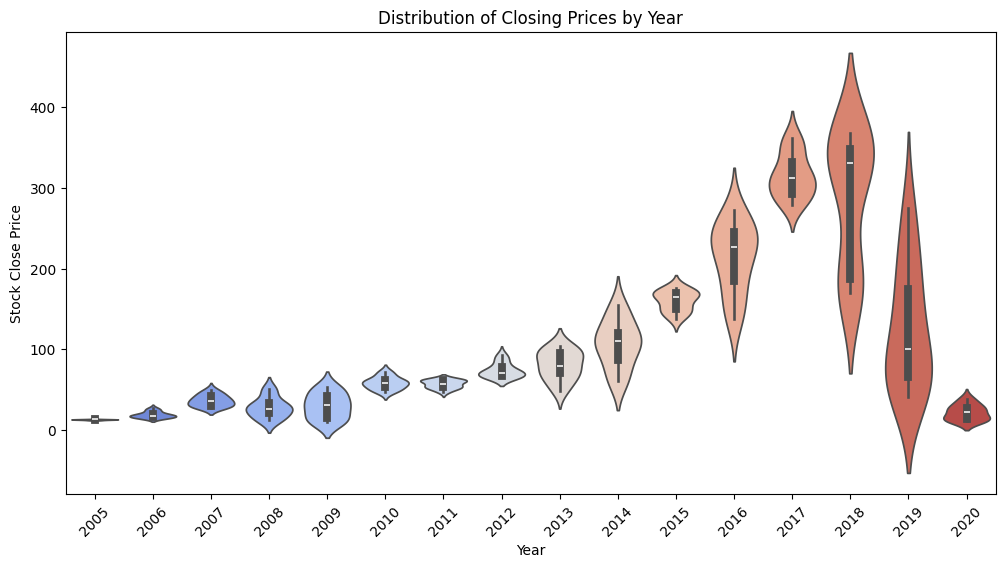

In [166]:

plt.figure(figsize=(12, 6))
sns.violinplot(x=data['Year'], y=data['Closing Price'], palette="coolwarm")
plt.xlabel('Year')
plt.ylabel('Stock Close Price')
plt.title('Distribution of Closing Prices by Year')
plt.xticks(rotation=45)
plt.show()






##### 1. Why did you pick the specific chart?

I picked the violin plot because it shows how stock prices are spread across years and helps compare them easily.

##### 2. What is/are the insight(s) found from the chart?

* Stock prices increased from 2009 to 2019.

* The highest price was in 2018, which is the peak.

* Prices dropped after 2018.

##### 3. Will the gained insights help creating a positive business impact?


* It helps understand when the stock performed well and when it declined.

* This can help investors make better decisions, like when to buy or sell.

* It also helps businesses plan strategies to grow or avoid risks.

#### Chart - 2

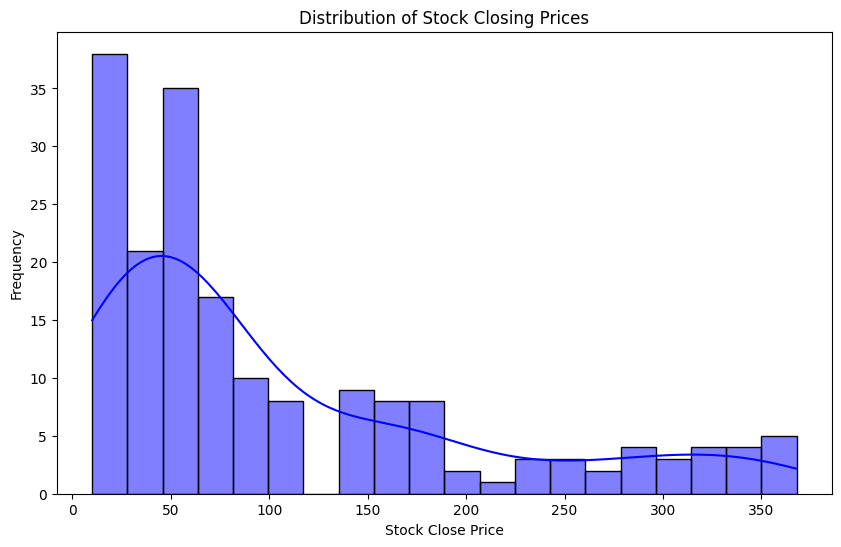

In [167]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Closing Price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Stock Closing Prices')
plt.xlabel('Stock Close Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

It shows how often different closing prices occurred, helping us see patterns in the stock's movement.

##### 2. What is/are the insight(s) found from the chart?

Left-skewed distribution → High prices were rare, and the stock mostly stayed low.

##### 3. Will the gained insights help creating a positive business impact?


The stock price rebounds after a drop (5 to 100), traders can use this pattern to maximize profits!

#### Chart - 3

C:\Users\tanve\AppData\Local\Temp\ipykernel_15304\3815182664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Month'], y=data['Closing Price'], palette="coolwarm")


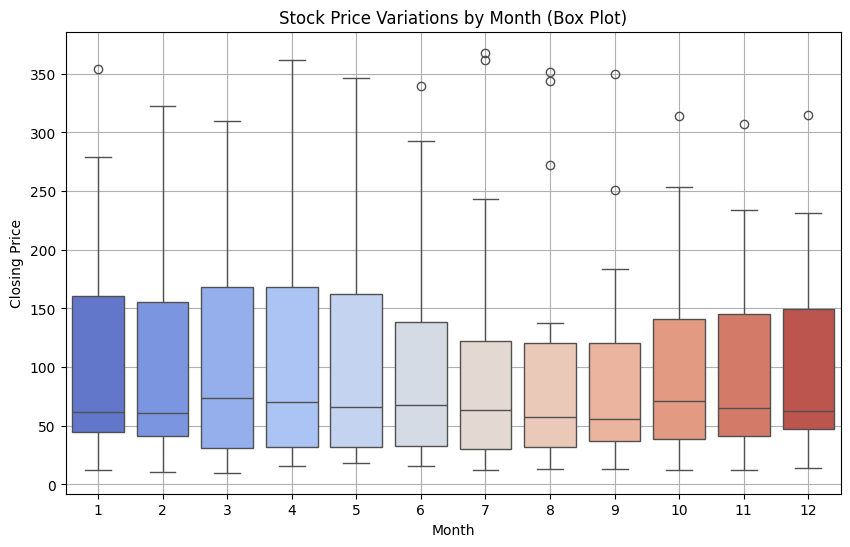

In [168]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Month'], y=data['Closing Price'], palette="coolwarm")
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.title('Stock Price Variations by Month (Box Plot)')
plt.grid(True)
plt.show()




##### 1. Why did you pick the specific chart?

A box plot was chosen because it:

* Shows monthly stock price variations clearly.

* Highlights trends, volatility, and outliers in different months.

* Helps identify when the stock is stable or fluctuating.



##### 2. What is/are the insight(s) found from the chart?

* Stock price increased from months 1 to 6. 📈

* then, it decreased after month 6. 📉

* From months 10 to 12, the price increased again. 🔼

This suggests a seasonal pattern where stock prices tend to rise in the first half of the year, drop mid-year, and rise again at the end.

##### 3. Will the gained insights help creating a positive business impact?



Investors time their trades—buy in the mid-year dip, sell when prices rise.


#### Chart - 4

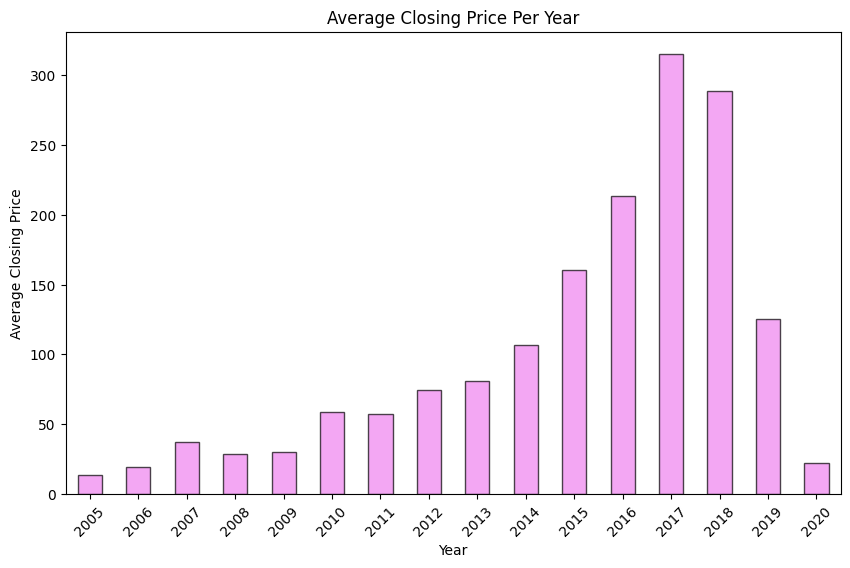

In [169]:
# Bar Chart: Average closing price per year
avg_close_per_year = data.groupby('Year')['Closing Price'].mean()

plt.figure(figsize=(10, 6))
avg_close_per_year.plot(kind='bar', color='violet', edgecolor='black', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title('Average Closing Price Per Year')
plt.xticks(rotation=45) 
plt.grid(False)  
plt.show()



##### 1. Why did you pick the specific chart?

The bar chart is chosen to show the average closing price per year, making it easy to compare yearly trends.

##### 2. What is/are the insight(s) found from the chart?

1. Steady Growth (2005-2015):

The stock price gradually increased, showing strong and stable growth.

Investor confidence remained high, with no major drops.

2. Sharp Surge (2016-2018):

The stock price saw a significant rise, indicating strong market sentiment and positive performance.

This period likely reflects good financial health and investor trust.

3. Sudden Drop (2018-2020):

After 2018, the stock price dropped sharply due to financial issues and potential governance concerns.

The price fluctuations suggest panic selling and investor uncertainty.

4. Post-2020 Stabilization:

After 2020, the stock remained at lower levels, showing that Yes Bank struggled to regain investor trust.

Despite efforts to restructure, market confidence remained weak.

##### 3. Will the gained insights help creating a positive business impact?


* Investors can plan buy/sell decisions based on price trends.

* Businesses can adjust financial strategies based on market performance.

#### Chart - 5

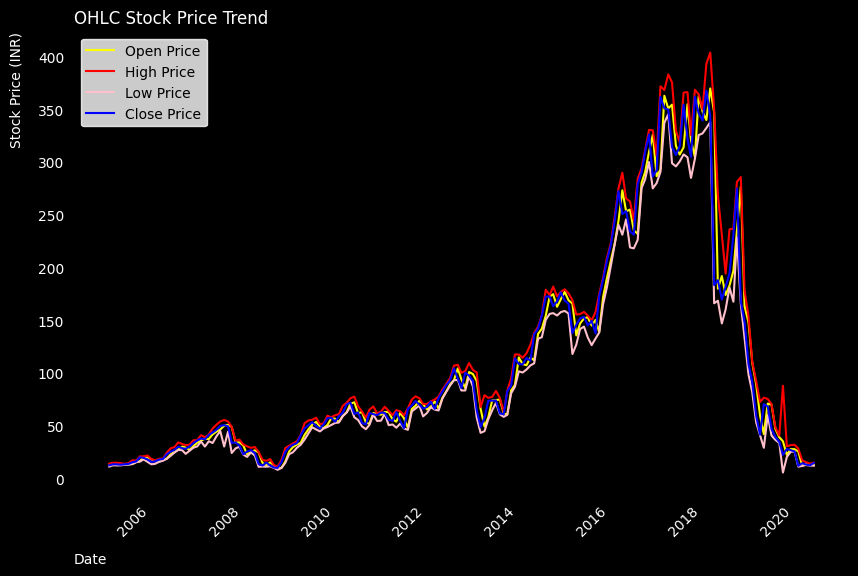

In [170]:
plt.figure(figsize=(10,6))
# Set the background color of the figure and axes
plt.gcf().set_facecolor('black')  # Sets the overall plot background to black
plt.gca().set_facecolor('black')  # Sets the axes background to black

# Plotting the data with different colors for the lines
plt.plot(data.index, data['Opening Price'], label='Open Price', color='yellow')
plt.plot(data.index, data['Highest Price'], label='High Price', color='red')
plt.plot(data.index, data['Lowest Price'], label='Low Price', color='pink')
plt.plot(data.index, data['Closing Price'], label='Close Price', color='blue')

plt.xlabel('Date', color='white', labelpad=10, loc='left')
plt.ylabel('Stock Price (INR)', color='white', labelpad=10, loc='top')
plt.title('OHLC Stock Price Trend', color='white', loc='left')

# Adding legend with white color for text, positioned to the left of the plot
plt.legend(facecolor='white', edgecolor='white', labels=['Open Price', 'High Price', 'Low Price', 'Close Price'], fontsize=10, loc='upper left', frameon=True)

plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.show()





##### 1. Why did you pick the specific chart?

The OHLC line chart is chosen to visualize price movements (Open, High, Low, Close) over time.

##### 2. What is/are the insight(s) found from the chart?

* From 2010 to 2017, all prices increased. 📈

* From 2017 to 2020, all prices decreased. 📉

##### 3. Will the gained insights help creating a positive business impact?


* Investors can identify trends for better trading decisions.

* Businesses can plan investments based on market cycles.

#### Chart - 6

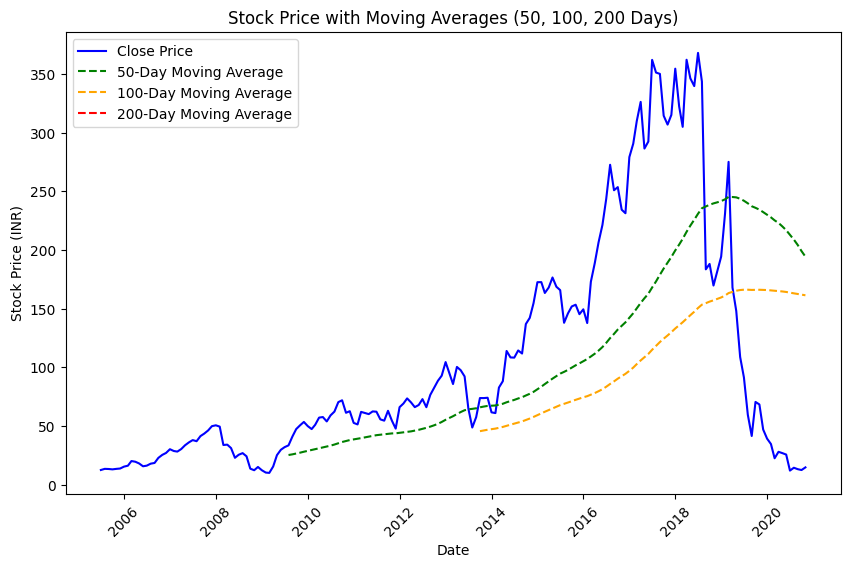

In [171]:
# Calculate moving averages
data['SMA50'] = data['Closing Price'].rolling(window=50).mean()
data['SMA100'] = data['Closing Price'].rolling(window=100).mean()
data['SMA200'] = data['Closing Price'].rolling(window=200).mean()

# Plot Close Price and Multiple Moving Averages
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Closing Price'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA50'], label='50-Day Moving Average', color='green', linestyle='--')
plt.plot(data.index, data['SMA100'], label='100-Day Moving Average', color='orange', linestyle='--')
plt.plot(data.index, data['SMA200'], label='200-Day Moving Average', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.title('Stock Price with Moving Averages (50, 100, 200 Days)')
plt.grid(False)
plt.legend()
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

The Moving Averages Chart helps track short-, mid-, and long-term trends in stock prices.

##### 2. What is/are the insight(s) found from the chart?

* Close price max: 350

* SMA50 max: 250

* SMA100 max: 150

All prices increased (2010-2017) 📈 and decreased (2017-2020) 📉

##### 3. Will the gained insights help creating a positive business impact?


Investors can use moving averages to spot trends & trade wisely and Businesses can adjust strategies based on market cycles.


#### Chart - 7

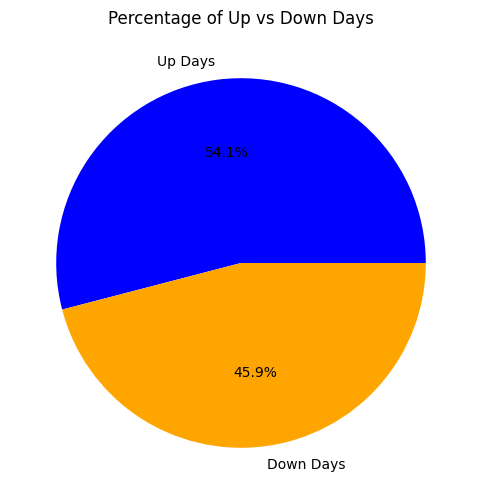

In [172]:
up_days = (data['Daily Change (%)'] > 0).sum()
down_days = (data['Daily Change (%)'] < 0).sum()
plt.figure(figsize=(6, 6))
plt.pie([up_days, down_days], labels=['Up Days', 'Down Days'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title("Percentage of Up vs Down Days")
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart visually compares up vs. down days in a clear and simple way.

##### 2. What is/are the insight(s) found from the chart?

* 54.1% Up Days 📈

* 45.9% Down Days 📉

The stock had slightly more positive days than negative ones.

##### 3. Will the gained insights help creating a positive business impact?


* Investors see a bullish tendency and plan trades.

* Traders adjust buy/sell strategies based on trends.


#### Chart - 8

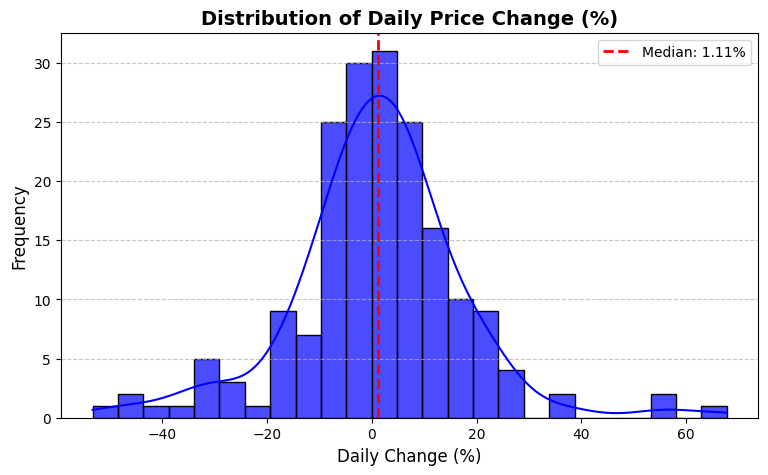

In [173]:


# Strip any leading/trailing spaces from the column names
data.columns = data.columns.str.strip()

data['Daily Change (%)'] = ((data['Closing Price'] - data['Opening Price']) / data['Opening Price']) * 100

plt.figure(figsize=(9,5))
sns.histplot(data['Daily Change (%)'], bins=25, kde=True, color='blue', edgecolor='black', alpha=0.7)

# Add a vertical line for the median
median_value = np.median(data['Daily Change (%)'])
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}%')

plt.xlabel("Daily Change (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Daily Price Change (%)", fontsize=14, fontweight='bold')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

A histogram with KDE helps visualize the distribution of daily stock price changes and identify patterns in price movements.

##### 2. What is/are the insight(s) found from the chart?

* Normal distribution 📊 → Most changes are near the average.

* Median: 1.11% 📈 → Typical daily movement is small.

* Daily changes range from -20% to 20% ⚖️ → Some extreme fluctuations.

##### 3. Will the gained insights help creating a positive business impact?


Traders can adjust strategies based on volatility and Investors can assess risk vs. reward.

#### Chart - 9

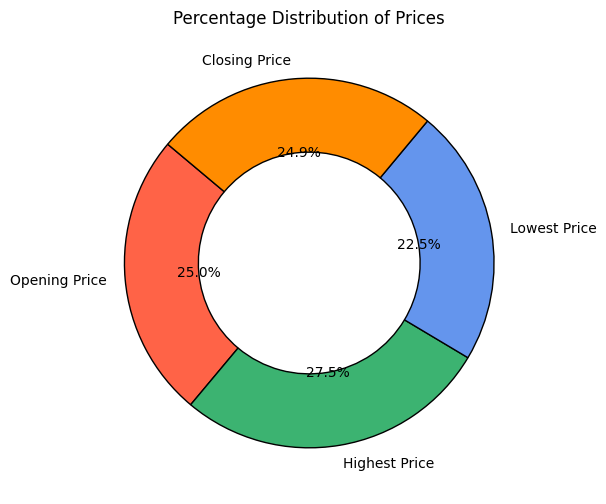

In [174]:

# Standardize column names: strip spaces and convert to lowercase
data.columns = data.columns.str.strip().str.lower()

# Define the corrected column names
expected_cols = ['opening price', 'highest price', 'lowest price', 'closing price']

# Check if all expected columns exist
missing_cols = [col for col in expected_cols if col not in data.columns]
if missing_cols:
    print("Missing columns:", missing_cols)
else:
    mean_values = data[expected_cols].mean()

   
    labels = ['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price']


    plt.figure(figsize=(6,6))
    plt.pie(mean_values, labels=labels, autopct='%1.1f%%', 
            colors=['#ff6347', '#3cb371', '#6495ed', '#ff8c00'], 
            wedgeprops={'width': 0.4, 'edgecolor': 'black'}, startangle=140)


    plt.title("Percentage Distribution of Prices")
    plt.ylabel("")  
    plt.show()






##### 1. Why did you pick the specific chart?

A donut chart clearly shows the proportion of different stock price levels (Open, High, Low, Close) in an intuitive way.

##### 2. What is/are the insight(s) found from the chart?

 * Highest Price (27.5%) 🟢 → Stock peaked frequently.

* Opening Price (25%) 🟠 → Stable market opening trends.

* Closing Price (24.9%) 🔴 → Consistent closing values.

* Lowest Price (22.5%) 🔵 → Dips were less common.

##### 3. Will the gained insights help creating a positive business impact?


* Traders can identify price trends for better entry/exit strategies.

* Investors can evaluate stock stability and volatility.

* Companies can assess price patterns for financial planning. 🚀


#### Chart - 10

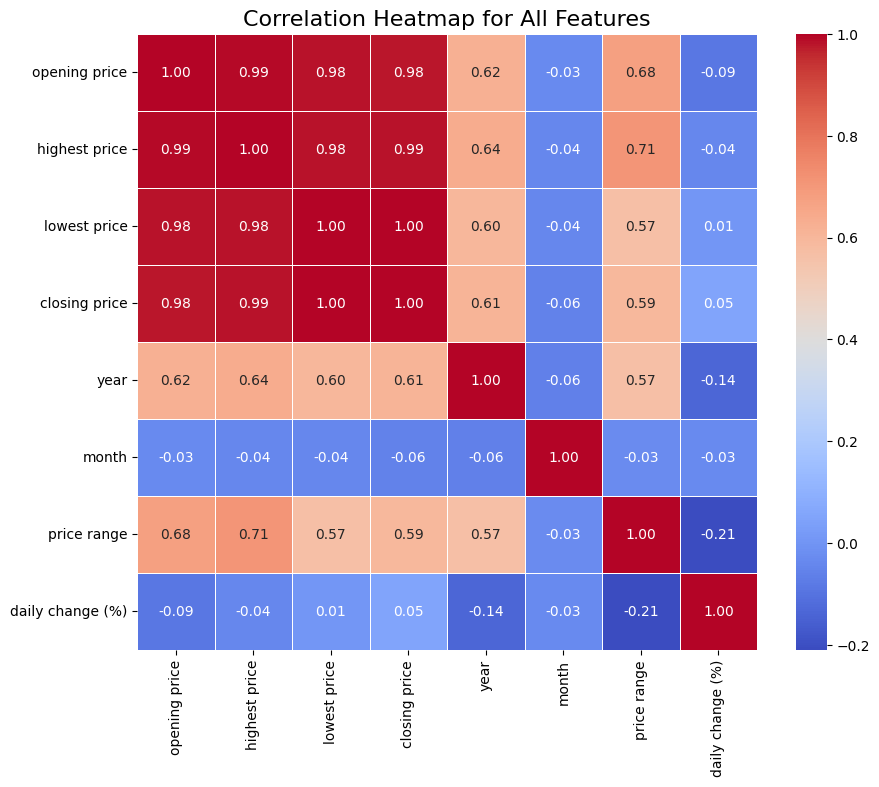

In [175]:

selected_cols = ['opening price', 'highest price', 'lowest price', 'closing price', 'year', 'month', 'price range', 'daily change (%)']
corr_matrix = data[selected_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for All Features', fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

The correlation heatmap was chosen because it clearly shows how stock price variables are related, helping identify key relationships.


##### 2. What is/are the insight(s) found from the chart?

* High Correlation Among Prices: Opening, High, Low, and Closing prices are strongly related.

* Price Range vs. Other Factors: Price range is moderately correlated with prices but weakly with daily change.

* Daily Change Impact: Daily change has the weakest correlation, meaning it’s less influenced by past prices.

##### 3. Will the gained insights help creating a positive business impact?


Yes, understanding these relationships can lead to better predictions and smarter investment strategies, improving decision-making and risk management.

#### Chart - 11

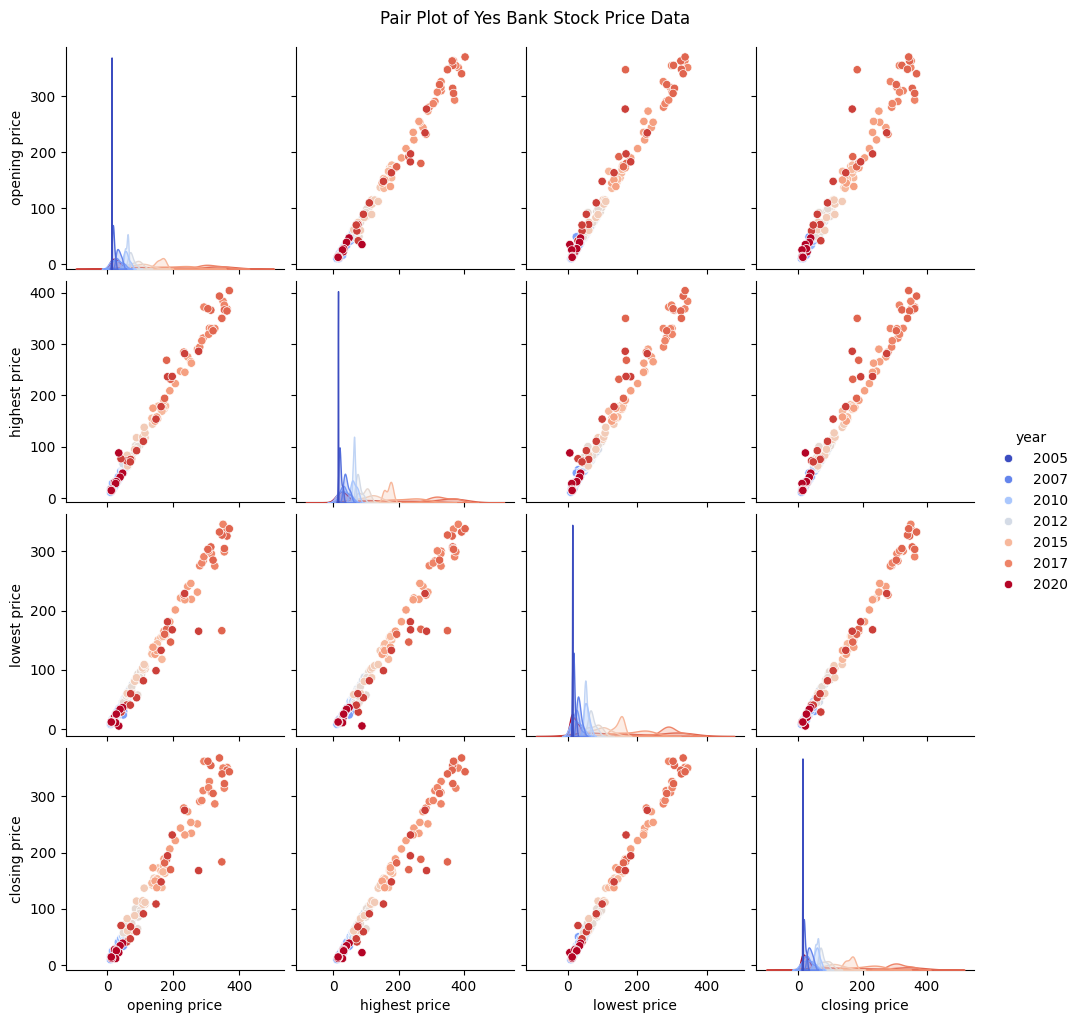

In [176]:

# Standardize column names: strip spaces and convert to lowercase
data.columns = data.columns.str.strip().str.lower()

columns_to_plot = ['opening price', 'highest price', 'lowest price', 'closing price']

# Check if 'year' exists in the dataset
if 'year' not in data.columns:
    print("Error: 'Year' column is missing from the dataset.")
else:
    sns.pairplot(data, vars=columns_to_plot, hue='year', palette='coolwarm')

    plt.suptitle('Pair Plot of Yes Bank Stock Price Data', y=1.02)

    plt.show()



##### 1. Why did you pick the specific chart?

A pair plot was chosen because it allows for the visualization of relationships between multiple stock prices (opening, highest, lowest, closing) and provides insights into how they correlate over different years.

##### 2. What is/are the insight(s) found from the chart?

* The chart reveals that all stock prices (opening, highest, lowest, and closing) have shown an increasing trend up to a point, with values rising from 0 to 200.

* After reaching a peak, the prices start to decrease, indicating possible fluctuations or corrections in the market.

* The strong correlations between the prices suggest that they tend to move in sync, reinforcing their interdependence.

##### 3. Will the gained insights help creating a positive business impact?


Yes, the insights will help understand stock price behavior over time, allowing for better market predictions, informed decision-making, and potentially improved investment strategies based on consistent patterns.

## **5. Solution to Business Objective**



Business Report: Yes Bank Stock Price Analysis (2005-2020)

1. Stock Price Trends:

* Growth-Peak-Decline Cycle:

2005-2015: Gradual growth, reflecting investor confidence and business expansion.
2016-2018: Rapid price surge, peaking above ₹350, driven by strong earnings and market trust.
2018-2020: Sharp decline due to financial instability and governance issues.
Post-2020: Stabilization at lower price levels, signaling a slow recovery.

* Market Trends:

Bullish (Growth): Before 2018.
Bearish (Decline): After 2018.
Seasonal Patterns: No strong seasonal trends, but price movements were influenced by financial events and regulatory changes.

2. Stock Volatility & Risk:

* Volatility:

2017-2019: High volatility with large fluctuations in stock prices.
2005-2015 & Post-2020: Lower volatility, indicating stability.

* Risk Assessment:

Investors who entered at prices above ₹250 in 2018 faced significant losses.
Post-2020, lower prices indicate a less risky environment but weaker growth potential.
External events like regulatory changes and economic downturns contributed to stock price instability.

3. Investment & Trading Opportunities:

* Investment Profitability:

Before 2015: Strong gains if exited during the 2017-2018 peak.
After 2018: Losses, emphasizing the need for risk management.

* Trading Opportunities:

Buying: Stocks below ₹50 post-2020 show stability, suitable for low-risk, long-term investments.
Selling: Stocks at ₹300-350 in 2018 were ideal exit points for short-term traders.

* Risk-Reward:

The 2019 fluctuations highlight high-risk environments.
Post-2020, lower risk but limited potential for high returns.

4. Impact of Financial Events:

* Regulatory & Financial Crises:

2018-2020: Governance issues and RBI interventions triggered a major decline.
The overall banking sector crisis and economic downturns post-2018 further weakened the stock’s value.

* Market Impact:

Regulatory changes, economic slowdowns, and rising Non-Performing Assets (NPAs) heavily impacted stock performance.

5. Data-Driven Insights for Financial Analysts:

* Predictive Modeling:

Strong correlations between opening, high, low, and closing prices suggest potential for forecasting future stock movements.
Volatility trends and market reactions can be used as indicators for future price behavior.

* Investment Decision Framework:

Use historical price data, correlation analysis, and scatter plots to evaluate future stock performance and assess risk.


# **Conclusion**

* For Investors: Use the historical data to evaluate profit trends, risk levels, and potential market stability.

* For Traders: Leverage volatility patterns and ideal entry/exit points for better decision-making.

* For Analysts: Apply predictive models and risk assessments based on historical performance for future evaluations.

This comprehensive report helps in making informed investment, trading, and financial analysis decisions related to Yes Bank's stock performance.